In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
results_file = "Meta.Fix.model.Result.txt"
results_df = pd.read_table(results_file, sep="\t")
results_df["meta.OR"] = np.exp(results_df["meta.beta"])

In [33]:
significant_snps = results_df[results_df["meta.pval"] < 5e-8]

In [69]:
def forest_plot_or(df, snp_list, y_label='rsID', or_label='meta.OR', se_label='meta.se'):
    df_interest = df[df[y_label].isin(snp_list)].copy()
    df_interest['lower'] = np.exp(np.log(df_interest[or_label]) - 1.96 * df_interest[se_label])
    df_interest['upper'] = np.exp(np.log(df_interest[or_label]) + 1.96 * df_interest[se_label])

    plt.figure(figsize=(8, len(snp_list) * 0.5))
    sns.set(style="whitegrid")
    ax = sns.scatterplot(x=or_label, y=y_label, data=df_interest, color='royalblue')
    ax.errorbar(df_interest[or_label], df_interest[y_label], xerr=df_interest['upper'] - df_interest['lower'], fmt='none', ecolor='darkblue', capsize=3)
    plt.axvline(x=1, color='orange', linestyle='--')
    plt.axvline(x=2, color='gray', linestyle='--')
    plt.xlim(0, 3.5)
    plt.xlabel("Odds Ratio (OR)")
    plt.ylabel("SNP")
    plt.title("Forest Plot of OR")
    plt.show()


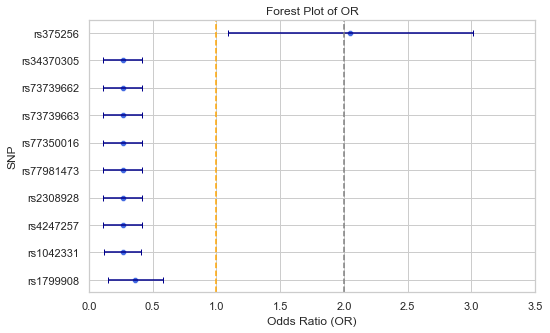

In [70]:
interest_snps = list(significant_snps["rsID"])
forest_plot_or(results_df, interest_snps)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

groupA_file = "GroupA.logistic"
groupB_file = "GroupB.logistic"
meta_file = "Meta.Fix.model.Result.txt"

groupA_df = pd.read_csv(groupA_file, sep="\t")
groupB_df = pd.read_csv(groupB_file, sep="\t")
meta_df = pd.read_csv(meta_file, sep="\t")
meta_df["meta.OR"] = np.exp(meta_df["meta.beta"])
significant_snps = meta_df[meta_df["meta.pval"] < 5e-8]
heterogeneity_snps = significant_snps[(significant_snps["meta.I2"] > 50) & (significant_snps["meta.Qpval"] < 0.05)]

In [73]:
def prepare_forest_plot_data(df, significant_snps, or_label="OR", se_label="LOG(OR)_SE"):
    significant_df = df[df["ID"].isin(significant_snps["rsID"])]
    significant_df["OR_lower"] = np.exp(np.log(significant_df[or_label]) - 1.96 * significant_df[se_label])
    significant_df["OR_upper"] = np.exp(np.log(significant_df[or_label]) + 1.96 * significant_df[se_label])
    significant_df["P-value"] = significant_df["P"]
    return significant_df

def forest_plot_or(df, snp_list, y_label='rsID', or_label='meta.OR', se_label='meta.se'):
    df_interest = df[df[y_label].isin(significant_snps["rsID"])].copy()
    df_interest['OR_lower'] = np.exp(np.log(df_interest[or_label]) - 1.96 * df_interest[se_label])
    df_interest['OR_upper'] = np.exp(np.log(df_interest[or_label]) + 1.96 * df_interest[se_label])
    df_interest['ID'] = df_interest['rsID']
    df_interest['OR'] = df_interest['meta.OR']
    df_interest['LOG(OR)_SE'] = df_interest['meta.se']
    df_interest["P-value"] = df_interest["meta.pval"]
    df_interest["Meta.I2"] =df_interest["meta.I2"]
    df_interest["Meta.P.adj"] = df_interest["meta.Qpval"]
    return df_interest

In [74]:
groupA_significant = prepare_forest_plot_data(groupA_df, significant_snps)
groupB_significant = prepare_forest_plot_data(groupB_df, significant_snps)
meta_significant = forest_plot_or(meta_df, significant_snps)

C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\1740776033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_df["OR_lower"] = np.exp(np.log(significant_df[or_label]) - 1.96 * significant_df[se_label])
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\1740776033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_df["OR_upper"] = np.exp(np.log(significant_df[or_label]) + 1.96 * significant_df[se_label])
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\1740776033

In [75]:
meta_significant["Meta.I2"] = round(meta_significant["Meta.I2"],2)
meta_significant["Meta.P.adj"] = round(meta_significant["Meta.P.adj"],4)
meta_significant.sort_values(["rsID"])

rsID  meta.beta   meta.se     meta.pval    meta.I2    meta.Q  \
7508   rs1042331  -1.344555  0.143685  8.152452e-21  49.071839  1.963550   
7514   rs1799908  -1.005671  0.156341  1.254802e-10   0.000000  0.476838   
7502   rs2308928  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   
7497  rs34370305  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   
7503   rs4247257  -1.289704  0.148674  4.145827e-18   0.000000  0.293920   
7498  rs73739662  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   
7499  rs73739663  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   
7500  rs77350016  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   
7501  rs77981473  -1.290103  0.148737  4.183323e-18   0.000000  0.293085   

      meta.Qpval   meta.OR  OR_lower  OR_upper          ID        OR  \
7508    0.161134  0.260656  0.196680  0.345441   rs1042331  0.260656   
7514    0.489858  0.365799  0.269254  0.496962   rs1799908  0.365799   
7502    0.588250  0.275243  0.205640  0.368403   rs2308928  0.275243   
7497    0.588250  0.275243  0.205640  0.368403  rs34370305  0.275243   
7503    0.587720  0.275352  0.205748  0.368504   rs4247257  0.275352   
7498    0.588250  0.275243  0.205640  0.368403  rs73739662  0.275243   
7499    0.588250  0.275243  0.205640  0.368403  rs73739663  0.275243   
7500    0.588250  0.275243  0.205640  0.368403  rs77350016  0.275243   
7501    0.588250  0.275243  0.205640  0.368403  rs77981473  0.275243   

      LOG(OR)_SE       P-value  Meta.I2  Meta.P.adj  
7508    0.143685  8.152452e-21    49.07      0.1611  
7514    0.156341  1.254802e-10     0.00      0.4899  
7502    0.148737  4.183323e-18     0.00      0.5883  
7497    0.148737  4.183323e-18     0.00      0.5883  
7503    0.148674  4.145827e-18     0.00      0.5877  
7498    0.148737  4.183323e-18     0.00      0.5883  
7499    0.148737  4.183323e-18     0.00      0.5883  
7500    0.148737  4.183323e-18     0.00      0.5883  
7501    0.148737  4.183323e-18     0.00      0.5883

In [76]:
def merge(df_list, group_labels, snp_list, y_label="ID", or_label="OR", se_label="LOG(OR)_SE"):
    plot_data = pd.DataFrame()
    
    for i, df in enumerate(df_list):
        df_interest = df[df[y_label].isin(snp_list)].copy()[['OR','ID','OR_lower','OR_upper','P-value']]
        df_interest["group"] = group_labels[i]
        plot_data = plot_data.append(df_interest)
    return(plot_data)

In [78]:
interest_snps = significant_snps["rsID"].tolist()
data = merge([groupA_significant, groupB_significant, meta_significant], ["Discovery Cohort", "Replication Cohort", "ZMeta"], interest_snps)
data["OR (95%CI)"] = 0
data.reset_index(drop=True,inplace=True)
for i, row in data.iterrows():
        data["OR (95%CI)"][i] = "{} ({}-{})".format(round(row["OR"],2),round(row["OR_lower"],2),round(row["OR_upper"],2))
data = data[["ID","P-value","OR (95%CI)","OR","OR_lower","OR_upper","group"]]
listx = []
for i in list(data["P-value"]):
    listx.append('%.2e' %  i)
listx
data["P-value"] = listx
data = data.sort_values(["ID","group"])
data

C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\2100658892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

ID   P-value        OR (95%CI)        OR  OR_lower  OR_upper  \
7    rs1042331  6.53e-18  0.28 (0.21-0.37)  0.275932  0.205919  0.369750   
16   rs1042331  9.80e-05  0.13 (0.05-0.36)  0.127923  0.045458  0.359989   
25   rs1042331  8.15e-21   0.26 (0.2-0.35)  0.260656  0.196680  0.345441   
8    rs1799908  2.54e-09  0.38 (0.27-0.52)  0.377915  0.274400  0.520480   
17   rs1799908  1.17e-02  0.26 (0.09-0.74)  0.255801  0.088581  0.738692   
26   rs1799908  1.25e-10   0.37 (0.27-0.5)  0.365799  0.269254  0.496962   
5    rs2308928  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
14   rs2308928  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
23   rs2308928  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   
0   rs34370305  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
9   rs34370305  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
18  rs34370305  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   
6    rs4247257  3.12e-16  0.28 (0.21-0.38)  0.281964  0.208099  0.382047   
15   rs4247257  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
24   rs4247257  4.15e-18  0.28 (0.21-0.37)  0.275352  0.205748  0.368504   
1   rs73739662  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
10  rs73739662  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
19  rs73739662  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   
2   rs73739663  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
11  rs73739663  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
20  rs73739663  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   
3   rs77350016  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
12  rs77350016  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
21  rs77350016  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   
4   rs77981473  3.15e-16  0.28 (0.21-0.38)  0.281848  0.207984  0.381944   
13  rs77981473  2.98e-03  0.21 (0.07-0.59)  0.209400  0.074617  0.587649   
22  rs77981473  4.18e-18  0.28 (0.21-0.37)  0.275243  0.205640  0.368403   

                 group  
7     Discovery Cohort  
16  Replication Cohort  
25               ZMeta  
8     Discovery Cohort  
17  Replication Cohort  
26               ZMeta  
5     Discovery Cohort  
14  Replication Cohort  
23               ZMeta  
0     Discovery Cohort  
9   Replication Cohort  
18               ZMeta  
6     Discovery Cohort  
15  Replication Cohort  
24               ZMeta  
1     Discovery Cohort  
10  Replication Cohort  
19               ZMeta  
2     Discovery Cohort  
11  Replication Cohort  
20               ZMeta  
3     Discovery Cohort  
12  Replication Cohort  
21               ZMeta  
4     Discovery Cohort  
13  Replication Cohort  
22               ZMeta

In [82]:
interest_snps = significant_snps["rsID"].tolist()
data = merge([groupA_significant, groupB_significant, meta_significant], ["Discovery Cohort", "Replication Cohort", "ZMeta"], interest_snps)
data["OR (95%CI)"] = 0
data.reset_index(drop=True,inplace=True)
for i, row in data.iterrows():
        data["OR (95%CI)"][i] = "{} ({}-{})".format(round(1/row["OR"],2),round(1/row["OR_upper"],2),round(1/row["OR_lower"],2))
        data["OR"][i] = round(1/row["OR"],2)
        x = round(1/row["OR_lower"],2)
        data["OR_lower"][i] = round(1/row["OR_upper"],2)
        data["OR_upper"][i] = x
        
data = data[["ID","P-value","OR (95%CI)","OR","OR_lower","OR_upper","group"]]
listx = []
for i in list(data["P-value"]):
    listx.append('%.2e' %  i)
listx
data["P-value"] = listx
data = data.sort_values(["ID","group"])
data

C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\993645664.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_data = plot_data.append(df_interest)
C:\Users\jiangxiaosen\AppData\Local\Temp\ipykernel_5296\2186842548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

ID   P-value         OR (95%CI)    OR  OR_lower  OR_upper  \
7    rs1042331  6.53e-18    3.62 (2.7-4.86)  3.62      2.70      4.86   
16   rs1042331  9.80e-05   7.82 (2.78-22.0)  7.82      2.78     22.00   
25   rs1042331  8.15e-21   3.84 (2.89-5.08)  3.84      2.89      5.08   
8    rs1799908  2.54e-09   2.65 (1.92-3.64)  2.65      1.92      3.64   
17   rs1799908  1.17e-02  3.91 (1.35-11.29)  3.91      1.35     11.29   
26   rs1799908  1.25e-10   2.73 (2.01-3.71)  2.73      2.01      3.71   
5    rs2308928  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
14   rs2308928  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
23   rs2308928  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
0   rs34370305  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
9   rs34370305  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
18  rs34370305  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
6    rs4247257  3.12e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
15   rs4247257  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
24   rs4247257  4.15e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
1   rs73739662  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
10  rs73739662  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
19  rs73739662  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
2   rs73739663  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
11  rs73739663  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
20  rs73739663  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
3   rs77350016  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
12  rs77350016  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
21  rs77350016  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   
4   rs77981473  3.15e-16   3.55 (2.62-4.81)  3.55      2.62      4.81   
13  rs77981473  2.98e-03    4.78 (1.7-13.4)  4.78      1.70     13.40   
22  rs77981473  4.18e-18   3.63 (2.71-4.86)  3.63      2.71      4.86   

                 group  
7     Discovery Cohort  
16  Replication Cohort  
25               ZMeta  
8     Discovery Cohort  
17  Replication Cohort  
26               ZMeta  
5     Discovery Cohort  
14  Replication Cohort  
23               ZMeta  
0     Discovery Cohort  
9   Replication Cohort  
18               ZMeta  
6     Discovery Cohort  
15  Replication Cohort  
24               ZMeta  
1     Discovery Cohort  
10  Replication Cohort  
19               ZMeta  
2     Discovery Cohort  
11  Replication Cohort  
20               ZMeta  
3     Discovery Cohort  
12  Replication Cohort  
21               ZMeta  
4     Discovery Cohort  
13  Replication Cohort  
22               ZMeta

In [83]:
data.to_csv('data.csv', index = False)